## Reading Images w/ imread (.png,.jpg, etc)

I keep running into circumstances in which it would be really handy to present an image under a plot to discuss slopes or other data features in the image. Not ready to worry about doing this with video yet but it's clearly a future question.

### References

Here are the references that I found to help this along the way. Initial efforts have been unsuccessful:)

[matplotlib.pyplot.imread](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imread.html)

[stackoverflow discussion](https://stackoverflow.com/questions/34458251/plot-over-an-image-background-in-python)

[matplotlib example](https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 8: Wind Power Installed

As is the way of things for me in Jupyter notebooks this problem generates a need to be able to make a plot over an image. Sheesh -- this game never stops! Let's see what happens...

Apparently when I was trying to do this on my office Windows machine the image wasn't being recognized as a .jpg which led to read errors. Now it seems to work just fine...whew!


In [2]:
img = plt.imread('images/InstalledWind.jpg')
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
ax.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'images/InstalledWind.jpg'

### Overlay with Line

Lots to consider here. Initially I just copied the code from the stackoverflow post. All works so now the question is how to resolve two final bits. Aligning the axes of the plot with the scales on the image and then creating a line that I can easily adjust to extract a feature of the graph.

#### Aligning Scales

This is really just a question of whether I can determine the scales I need and then display the image so that it stays aligned. In this example I need to set the horizontal scale to years that run from about 1997 to 2019 so that the ticks drop appropriately under the bars. I'm sure this will blow up the first couple of trys but here goes.

[pyplot.axis ref](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html)

This useful thing came up about tick marks
[tick marks scientific](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ticklabel_format)

[range documentation](https://docs.python.org/2/library/functions.html#range)

After being confused by this for a while it appears that when the image is resampled to fit in the display box it 'must' use a scale that is the same in each direction while my plot may well have very different scales in the sense of the meaning of each tick mark. In this example 1 tick horizontally is 1 year roughly and vertically each tick is 10,000 GW. When I try to embed these two object in the fig container the image forces the scale of the ticks to be the same in each direction. This suggests that the working solution will be to make two plot containers. One for the image and one for the plot. I think in general the two plots can share a common horizontal axis without getting screwed up. -- onwards!

In [ ]:
fig, ax2 = plt.subplots()
x = range(300)

fig.set_size_inches(9, 6)
xlow = 1997
xhigh = 2019
ylow = 20000
yhigh = 20200
ax2.set(xlim=(xlow, xhigh), ylim=(ylow, yhigh))
ax2.imshow(img, extent=[xlow, xhigh, ylow, yhigh])
ax2.plot(x, x, '--', linewidth=5, color='firebrick')

### Two Plots with Shared Horizontal Axis

Here goes....

[twin plots matplotlib examples](https://matplotlib.org/gallery/api/two_scales.html)

Because the tick labels for the y axis of the image are meaningless I shut off the labels on the ticks using ```xticks()```

[xticks() documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html)

[subplots tick.params](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.tick_params.html)

This allows me to use the ```labelsize = "0."``` to set the size of the labels on the image to 0 as a way of turning them off.

In [ ]:
# Set plot limits
# xlow3, xhigh3 will be shared limits. 
# ylow3, yhigh3 set proportions for image with the x lim above
# ylow4, yhigh4 set scale for superimposed line
xlow3 = 1998.
xhigh3 = 2018.5
ylow3 = 1996
yhigh3 = 2009
ylow4 = -12E+3
yhigh4 = 11E+4

fig, ax3 = plt.subplots()

color = 'tab:red'
ax3.tick_params(axis='y', labelleft = False, labelright = False, left = False, right = False)
ax3.imshow(img, extent=[xlow3, xhigh3, ylow3, yhigh3])

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

# create the overlaid line
fitlow = 2005.
fithigh = 2018
fitstep = 25
offset = 4500.
fitslope = 7200.
xfit = np.linspace(fitlow,fithigh,fitstep)
yfit = fitslope*(xfit - fitlow) + offset
# print(xfit)
# print(yfit)

color = 'tab:blue'
ax4.plot(xfit, yfit, '--', linewidth=5, color='firebrick')
ax4.set(xlim=(xlow3, xhigh3), ylim=(ylow4, yhigh4))
ax4.tick_params(axis='y',direction = "in", length = .1, labelleft = True, labelright = False, right = False, left = True)

fig.set_size_inches(9, 6)
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Layering Issues

In an effort to move the y axis labels from the fit line to the left side of the plot I reversed the order of the subplot calls. This turns out to layer the image on top of the line plot which is NOT helpful except that it does give a little more insight into how the subplots call is building the overall plot. **DON'T DO THIS:)**

In [ ]:
# Set plot limits
# xlow3, xhigh3 will be shared limits. 
# ylow3, yhigh3 set proportions for image with the x lim above
# ylow4, yhigh4 set scale for superimposed line
xlow3 = 1998.
xhigh3 = 2018.5
ylow3 = 1996
yhigh3 = 2009
ylow4 = -12E+3
yhigh4 = 11E+4

fig, ax3 = plt.subplots()

# create the overlaid line
fitlow = 2005.
fithigh = 2018
fitstep = 25
offset = 4500.
fitslope = 7200.
xfit = np.linspace(fitlow,fithigh,fitstep)
yfit = fitslope*(xfit - fitlow) + offset
# print(xfit)
# print(yfit)

color = 'tab:blue'
#ax3.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax3.plot(xfit, yfit, '--', linewidth=5, color='firebrick')
ax3.set(xlim=(xlow3, xhigh3), ylim=(ylow4, yhigh4))
ax3.tick_params(axis='y', labelleft = True, labelright = False, right = False, left = True)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
#ax4.set_xlabel('time (s)')
#ax4.set_ylabel('exp', color=color)
#ax4.imshow(img, extent=[xlow3, xhigh3, ylow3, yhigh3])
ax4.tick_params(axis='y', labelsize = "0.", labelright = False, right = False)

fig.set_size_inches(9, 6)
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Just the tick's.....

left and right turn on or off the ticks, labelleft and labelright turn on or off the labels on the ticks. Seems to work. In the documentation (above) I'm begining to understand the requirements of the arguments. Bool => True or False, float => a float number, and other arguments must be in single quotes. 

NameError: name 'img' is not defined

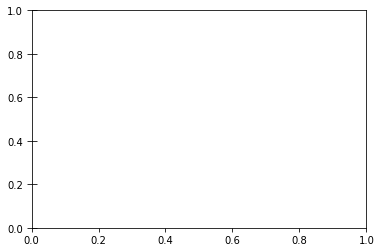

In [3]:
fig, axx = plt.subplots()
axx.tick_params(
    axis='y',
    labelleft = True, 
    labelright = False,
    direction = 'inout',
    length = 10.,
    left = True, 
    right = False)
axx.imshow(img, extent=[xlow3, xhigh3, ylow3, yhigh3])

fig.set_size_inches(9, 6)
plt.show()